In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('Automobile_data.csv', usecols=['engine-size', 'horsepower'])

In [35]:
df.columns

Index(['engine-size', 'horsepower'], dtype='object')

In [36]:
df.head()

,engine-size,horsepower
0,130,111
1,130,111
2,152,154
3,109,102
4,136,115


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
engine-size    205 non-null int64
horsepower     205 non-null object
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [38]:
#Mengetahui jumlah kolom dan baris dari data.
df.shape

(205, 2)

In [39]:
df['horsepower'].replace('?','0', inplace=True)
df['engine-size'].replace('?','0', inplace=True)

In [40]:
df['horsepower'] = [int(x) for x in df['horsepower']]
df['engine-size'] = [int(x) for x in df['engine-size']]

In [41]:
df.describe()

,engine-size,horsepower
count,205.000000,205.000000
mean,126.907317,103.239024
std,41.642693,40.832470
min,61.000000,0.000000
25%,97.000000,70.000000
50%,120.000000,95.000000
75%,141.000000,116.000000
max,326.000000,288.000000


In [42]:
df.isnull().sum()

engine-size    0
horsepower     0
dtype: int64

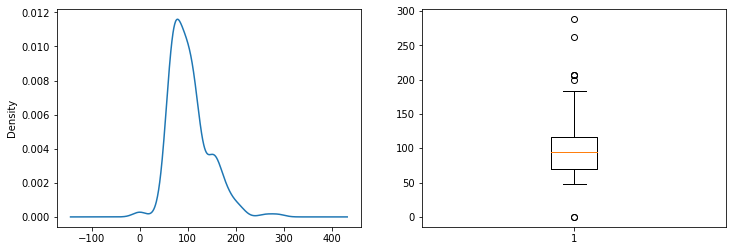

In [43]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

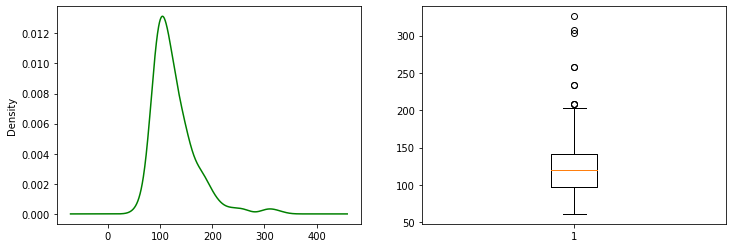

In [44]:
#Univariate analysis price.
#Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['engine-size'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['engine-size'])
plt.show()

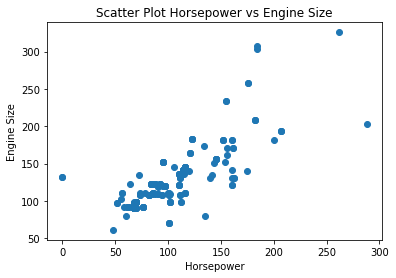

In [45]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['engine-size'])
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.title('Scatter Plot Horsepower vs Engine Size')
plt.show()

In [46]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,engine-size,horsepower
engine-size,1.000000,0.781577
horsepower,0.781577,1.000000


In [47]:
#buat variabel x dan y.
x = df['horsepower'].values.reshape(-1,1)
y = df['engine-size'].values.reshape(-1,1)

In [48]:
#sisihkan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [49]:
#membuat object model
lin_reg = LinearRegression()

In [50]:
#training model
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#print coefisieen dan intercept
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.81005347]]
[43.44686798]


In [52]:
lin_reg.score(x_test, y_test)

0.5797841960092698

Text(0.5, 1.0, 'Plot Horsepower vs Engine Size')

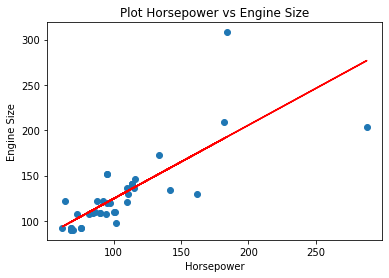

In [53]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Engine Size')
plt.title('Plot Horsepower vs Engine Size')

#sumber : https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf